<a href="https://colab.research.google.com/github/makarandmadhavi/Model-Interpretability-Marketting-Campaign/blob/main/Model_Interpretability_Marketting_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Interpretability Marketting Campaign

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

 

Grading:  80% if meet the above requirements

Up to 20% for presentation and expanation.


## About Dataset - Marketing Campaign

Dataset Link - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

**Context**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

In [ ]:
!pip install h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/ML-Data-Cleaning-and-Feature-Selection/main/marketing_campaign.csv", sep=";")
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# EDA Data Cleaning and feature engineering


In [ ]:

data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})

Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)

from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days

data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)

dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')

data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)
data.drop(['Marital_Status_Single'], axis=1, inplace=True)


data.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple
0,63,2,58138.0,2675,58,3,7,0,1,0,1617,22,0,0
1,66,2,46344.0,2125,38,2,5,0,0,2,27,4,0,0
2,55,2,71613.0,2324,26,1,4,0,0,0,776,20,0,1
3,36,2,26646.0,2151,26,2,6,0,0,1,53,6,0,1
4,39,4,58293.0,2173,94,5,5,0,0,1,422,14,0,1


<Axes: >

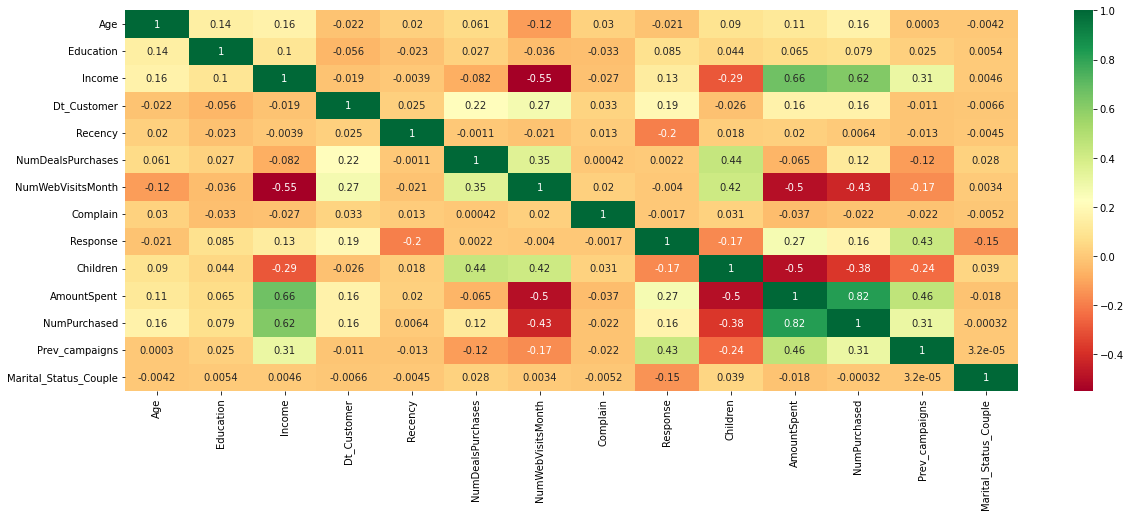

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Logistic Regression ( Linear model )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
y=data['Response']#specify the dependent variable and independent variable
x=data.drop(['Response'],axis=1)
x.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple
0,63,2,58138.0,2675,58,3,7,0,0,1617,22,0,0
1,66,2,46344.0,2125,38,2,5,0,2,27,4,0,0
2,55,2,71613.0,2324,26,1,4,0,0,776,20,0,1
3,36,2,26646.0,2151,26,2,6,0,1,53,6,0,1
4,39,4,58293.0,2173,94,5,5,0,1,422,14,0,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group
x_train.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple
601,60,2,62807.0,2679,83,3,5,0,1,819,20,0,1
1398,52,3,63841.0,2446,64,1,6,0,1,908,21,0,0
776,55,4,40760.0,2315,64,2,6,0,1,93,6,0,0
2005,43,2,30368.0,2246,97,2,8,0,1,52,5,0,1
1200,43,2,54809.0,2303,0,4,4,0,2,174,8,0,1


In [ ]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.8577008928571429


In [ ]:
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print(cm)

[[362  14]
 [ 62  10]]


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              111.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                   1.18e-231
Time:                        19:35:17   Log-Likelihood:                         -484.13
No. Observations:                2240   AIC:                                      994.3
Df Residuals:                    2227   BIC:                                      1069.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0013      0.001     -2.422      0.016      -0.002      -0.000
Education                 0.0266      0.008      3.535      0.000       0.012       0.041
Income                -5.288e-07   3.66e-07     -1.443      0.149   -1.25e-06     1.9e-07
Dt_Customer               0.0001   1.83e-05      7.015      0.000    9.24e-05       0.000
Recency                  -0.0026      0.000    -11.648      0.000      -0.003      -0.002
NumDealsPurchases         0.0147      0.004      3.515      0.000       0.006       0.023
NumWebVisitsMonth         0.0065      0.004      1.713      0.087      -0.001       0.014
Complain                  0.0514      0.066      0.776      0.438      -0.078       0.181
Children                 -0.0450      0.011     -3.930      0.000      -0.067      -0.023
AmountSpent               0.0001   2.25e-05      4.830      0.000    6.46e-05       0.000
NumPurchased             -0.0063      0.002     -3.746      0.000      -0.010      -0.003
Prev_campaigns            0.1995      0.011     18.425      0.000       0.178       0.221
Marital_Status_Couple    -0.1167      0.013     -8.801      0.000      -0.143      -0.091
==============================================================================
Omnibus:                      534.857   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1096.672
Skew:                           1.396   Prob(JB):                    7.26e-239
Kurtosis:                       4.990   Cond. No.                     6.03e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Random Forest (Tree based model)


Accuracy Score: 0.8348214285714286
Confusion Matrix:
[[335  41]
 [ 33  39]]

Decision Tree:



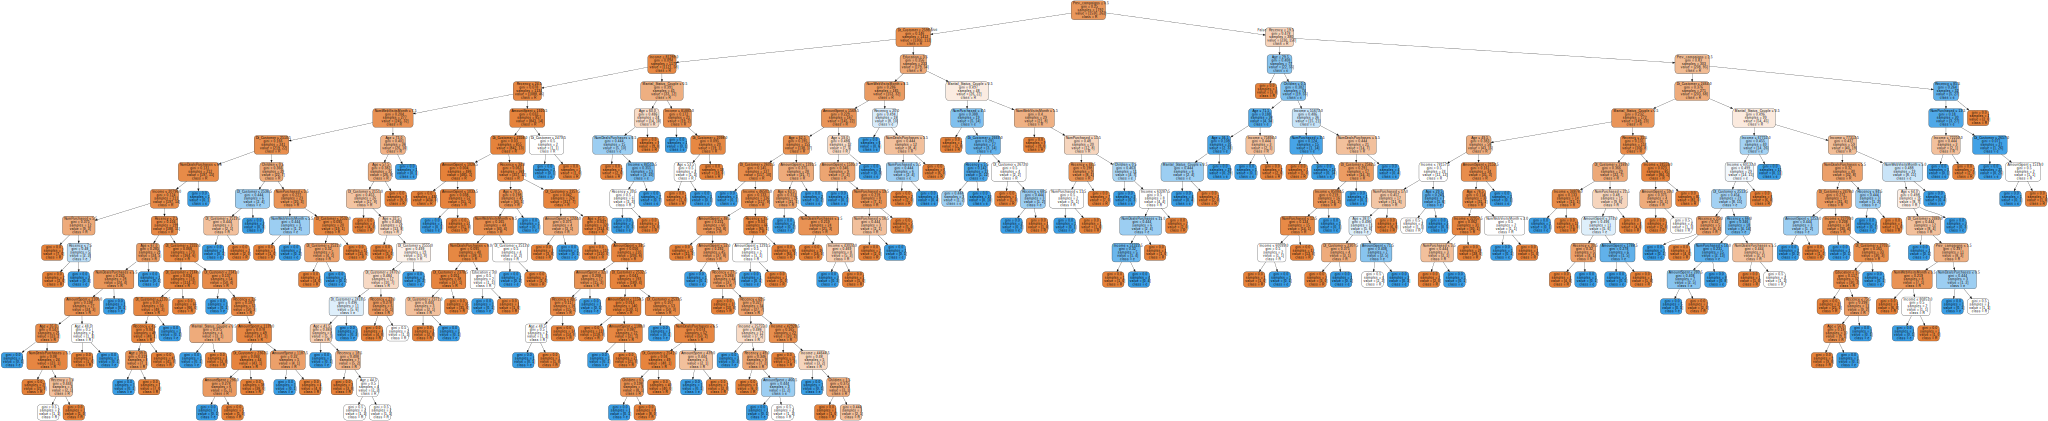

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(x_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(x_test)

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy Score: {}".format(acc_score))
print("Confusion Matrix:\n{}".format(conf_mat))

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=x_train.columns, class_names=y_train.name, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer_decision_tree")

# Print the decision tree
print("\nDecision Tree:\n")
graph = graphviz.Source(dot_data)
graph


In [ ]:

# Get numerical feature importances
tree_importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [ ]:

# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Prev_campaigns       Importance: 0.19
Variable: Dt_Customer          Importance: 0.15
Variable: Recency              Importance: 0.13
Variable: Income               Importance: 0.12
Variable: Age                  Importance: 0.1
Variable: AmountSpent          Importance: 0.08
Variable: NumPurchased         Importance: 0.06
Variable: NumDealsPurchases    Importance: 0.04
Variable: NumWebVisitsMonth    Importance: 0.04
Variable: Marital_Status_Couple Importance: 0.04
Variable: Education            Importance: 0.02
Variable: Children             Importance: 0.02
Variable: Complain             Importance: 0.0


# Auto ML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 30 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_k422hy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.161 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2240
Cols:14

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     2        14.2857             700  B   1.50973
CXI           Sparse Integers            1        7.14286             118  B   0.254497
C1N           1-Byte Integers (w/o NAs)  8        57.1429             18.0 KB  39.8223
C2            2-Byte Integers            2        14.2857             8.9 KB   19.6178
C8D           64-bit Reals               1        7.14286             17.6 KB  38.7957

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  45.3 KB  2240              1                              14
mean             45.3 KB  2240              1                              14
min              45.3 KB  2240              1                              14
max              45.3 KB  2240              1                              14
stddev           0  B     0                 0                              0
total            45.3 KB  2240              1                              14

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple
type,int,int,real,int,int,int,int,int,enum,int,int,int,int,int
mins,24.0,1.0,1730.0,2012.0,0.0,0.0,0.0,0.0,,0.0,5.0,0.0,0.0,0.0
mean,51.19419642857146,2.6656249999999995,52253.5923754887,2365.5821428571417,49.10937499999992,2.325000000000002,5.316517857142867,0.009375,,0.9504464285714285,605.7982142857137,12.537053571428563,0.29776785714285764,0.6446428571428572
maxs,127.0,4.0,666666.0,2711.0,99.0,15.0,20.0,1.0,,3.0,2525.0,32.0,4.0,1.0
sigma,11.984069456885834,0.8396582401489975,25039.085600503313,202.12251234854054,28.96245280837821,1.9322375008559796,2.42664500954729,0.09639116794449755,,0.7518028216317171,602.2492880109676,7.205740743783679,0.6783807663650678,0.47872827022787195
zeros,0,0,0,0,28,46,11,2219,,638,0,6,1777,796
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,2.0,58138.0,2675.0,58.0,3.0,7.0,0.0,1,0.0,1617.0,22.0,0.0,0.0
1,66.0,2.0,46344.0,2125.0,38.0,2.0,5.0,0.0,0,2.0,27.0,4.0,0.0,0.0
2,55.0,2.0,71613.0,2324.0,26.0,1.0,4.0,0.0,0,0.0,776.0,20.0,0.0,1.0


In [ ]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [ ]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_2_20230322_193519,0.892589,0.258043,0.635107,0.230258,0.278452,0.0775357
StackedEnsemble_AllModels_1_AutoML_2_20230322_193519,0.891397,0.25914,0.632746,0.230667,0.278562,0.0775966
GBM_1_AutoML_2_20230322_193519,0.889651,0.270226,0.613992,0.221809,0.28749,0.0826507
GBM_3_AutoML_2_20230322_193519,0.882323,0.302865,0.598272,0.241878,0.299913,0.0899476
XGBoost_1_AutoML_2_20230322_193519,0.876419,0.335336,0.578062,0.236984,0.321974,0.103667
XGBoost_3_AutoML_2_20230322_193519,0.874931,0.317691,0.572909,0.2336,0.305255,0.0931808
GBM_2_AutoML_2_20230322_193519,0.874773,0.302686,0.592977,0.25684,0.300152,0.0900911
GLM_1_AutoML_2_20230322_193519,0.87415,0.275578,0.590705,0.215192,0.287804,0.0828312
XGBoost_2_AutoML_2_20230322_193519,0.874001,0.324052,0.571634,0.207733,0.312848,0.0978739
DRF_1_AutoML_2_20230322_193519,0.871929,0.510725,0.575585,0.237589,0.313864,0.0985106


In [ ]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.0976660821667283
RMSE: 0.31251573107081876
LogLoss: 0.31239704284837644
AUC: 0.8897079772079771
AUCPR: 0.6315109343747229
Gini: 0.7794159544159542
Null degrees of freedom: 437
Residual degrees of freedom: 432
Null deviance: 415.1641111829005
Residual deviance: 273.65980953517777
AIC: 285.65980953517777

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12986169872886236
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      292  68   0.1889   (68.0/360.0)
1      13   65   0.1667   (13.0/78.0)
Total  305  133  0.1849   (81.0/438.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.129862     0.616114  128
max f2                       0.107628     0.738758  150
max f0point5                 0.390806     0.685185  45
max accuracy                 0.390806     0.881279  45
max precision                0.959054     1         0
max recall                   0.00479561   1         355
max specificity              0.959054     1         0
max absolute_mcc             0.390806     0.543546  45
max min_per_class_accuracy   0.135108     0.816667  125
max mean_per_class_accuracy  0.115668     0.823932  138
max tns                      0.959054     360       0
max fns                      0.959054     77        0
max fps                      0.000551748  360       399
max tps                      0.00479561   78        355
max tnr                      0.959054     1         0
max fnr                      0.959054     0.987179  0
max fpr                      0.000551748  1         399
max tpr                      0.00479561   1         355

Gains/Lift Table: Avg response rate: 17.81 %, avg score: 13.90 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114155                   0.862172           3.36923   3.36923            0.6              0.913287    0.6                         0.913287            0.0384615       0.0384615                  236.923   236.923            0.032906
2        0.0205479                   0.807286           5.61538   4.36752            1                0.836912    0.777778                    0.879343            0.0512821       0.0897436                  461.538   336.752            0.084188
3        0.0319635                   0.770547           4.49231   4.41209            0.8              0.792746    0.785714                    0.848416            0.0512821       0.141026                   349.231   341.209            0.132692
4        0.0410959                   0.720466           5.61538   4.67949            1                0.735245    0.833333                    0.823267            0.0512821       0.192308                   461.538   367.949            0.183974
5        0.0502283                   0.621416           5.61538   4.84965            1                0.659485    0.863636                    0.793488            0.0512821       0.24359                    461.538   384.965            0.235256
6        0.100457                    0.421601           3.82867   4.33916            0.681818         0.520152    0.772727                    0.65682             0.192308        0.435897                   282.867   333.916            0.40812
7        0.150685                    0.287653           2.2972    3.65851            0.409091         0.359481    0.651515                    0.557707     

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

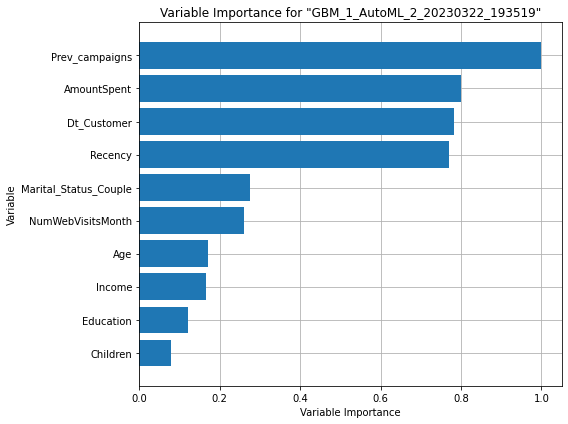

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

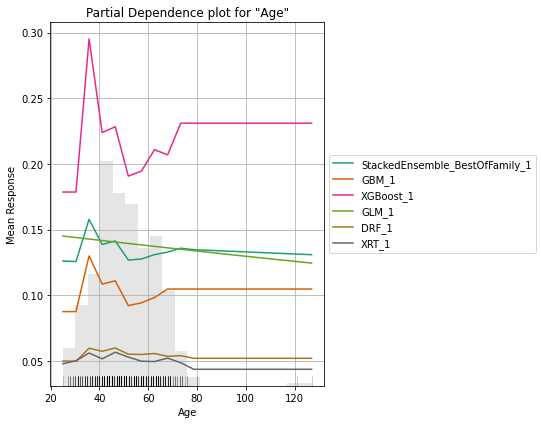

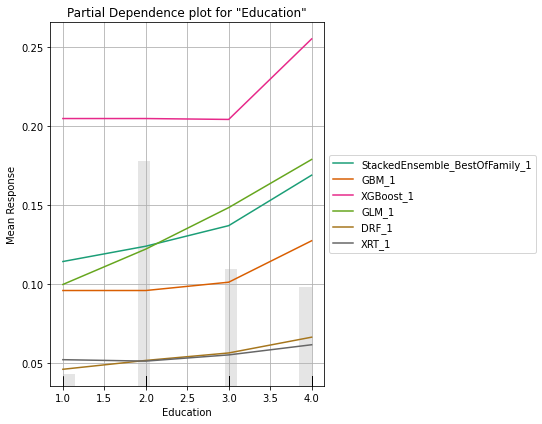

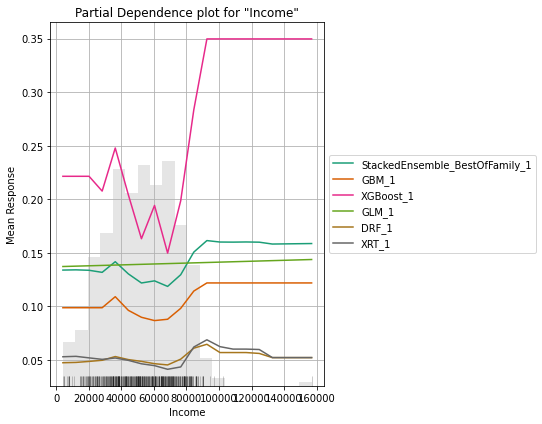

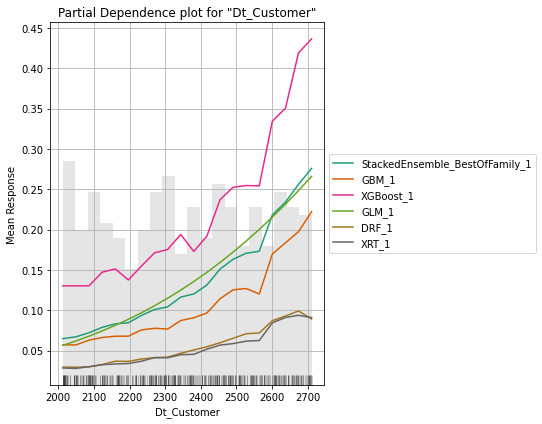

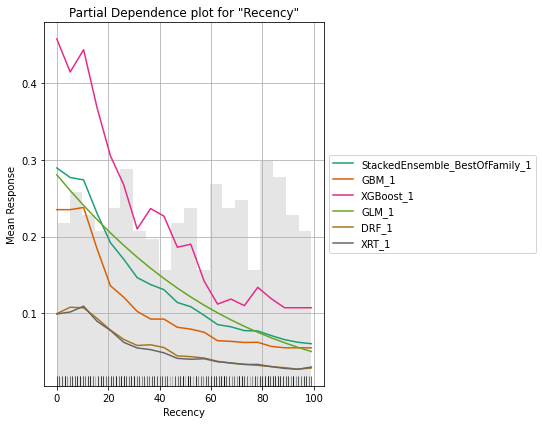

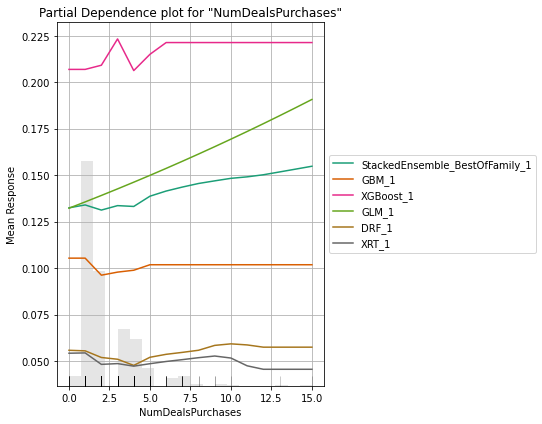

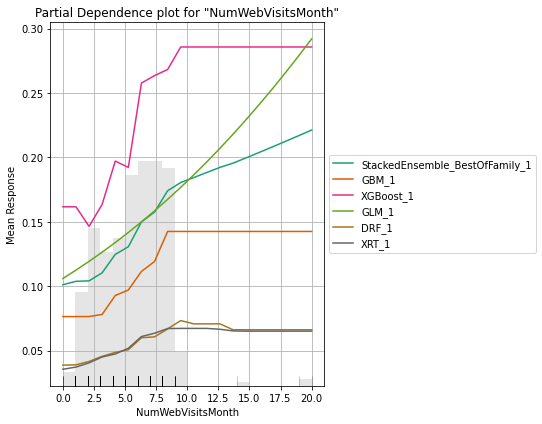

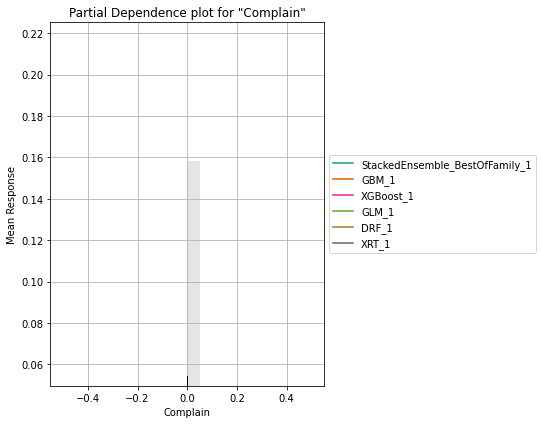

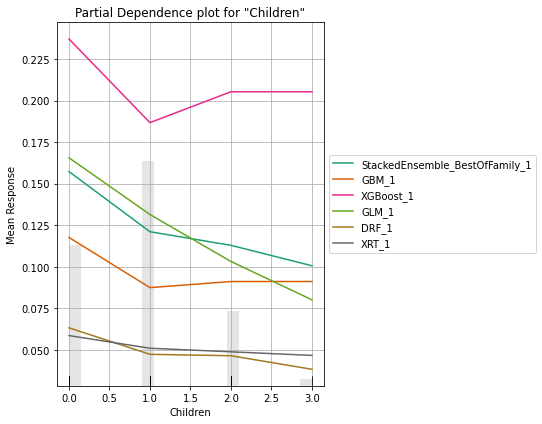

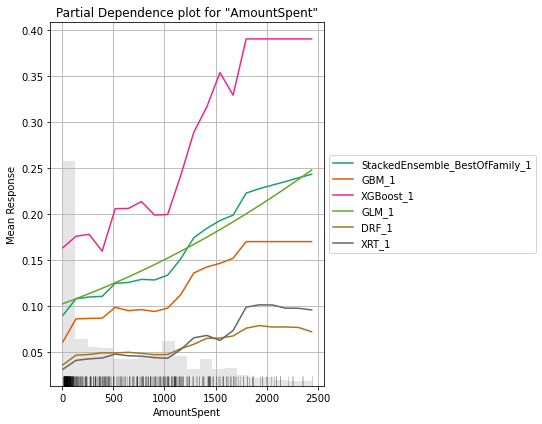

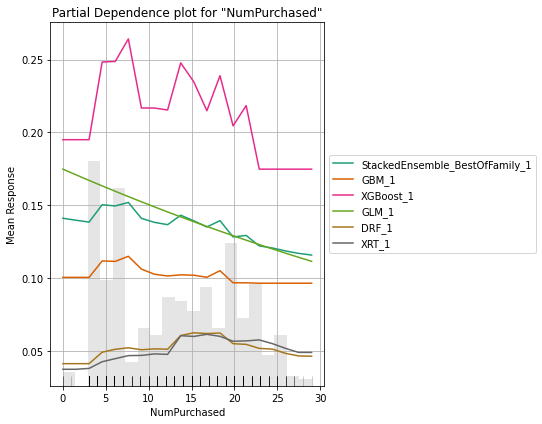

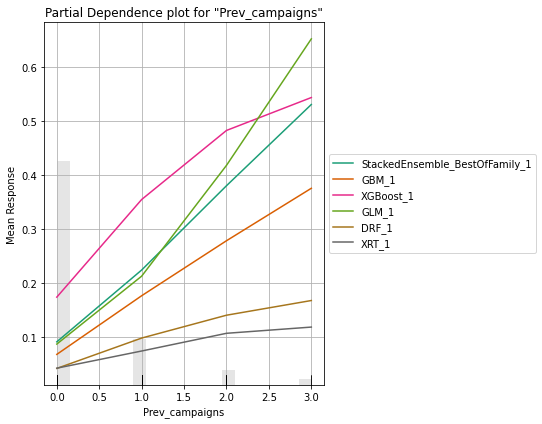

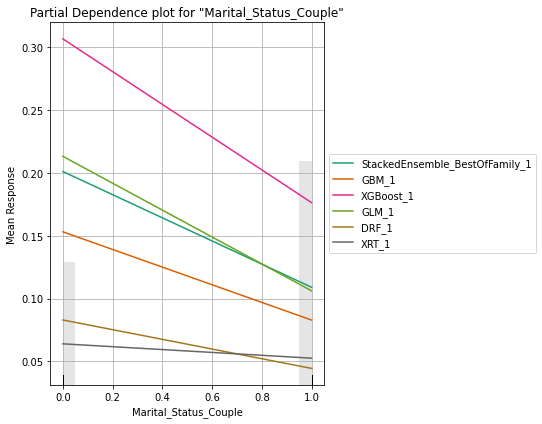

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

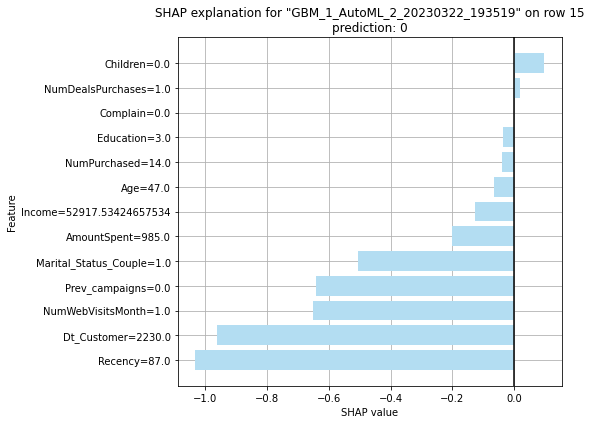

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")
